In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

P:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!pip install odfpy

In [3]:
dados = pd.ExcelFile('Beneficios.xlsx')
print(dados.sheet_names)
df1 = dados.parse('Benefício')

['Perguntas', 'Benefício']


In [4]:
df1.head()

,Unnamed: 0,UF,Mês/Ano,Valor Transferido,Programa Social
0,NaN,Inválido,2022-01-01,-6631.78,Seguro Defeso
1,NaN,AP,2022-01-01,3451.00,Auxílio Emergencial
2,NaN,Inválido,2022-01-01,3636.00,BPC
3,NaN,AC,2022-01-01,4602.00,Auxílio Emergencial
4,NaN,DF,2022-01-01,8898.00,Auxílio Emergencial


In [5]:
df1 = df1.drop('Unnamed: 0', axis = 1)
df1.head()

,UF,Mês/Ano,Valor Transferido,Programa Social
0,Inválido,2022-01-01,-6631.78,Seguro Defeso
1,AP,2022-01-01,3451.00,Auxílio Emergencial
2,Inválido,2022-01-01,3636.00,BPC
3,AC,2022-01-01,4602.00,Auxílio Emergencial
4,DF,2022-01-01,8898.00,Auxílio Emergencial


In [6]:
df1.drop([0,2,6], inplace = True)

In [7]:
df1.head()

,UF,Mês/Ano,Valor Transferido,Programa Social
1,AP,2022-01-01,3451.0,Auxílio Emergencial
3,AC,2022-01-01,4602.0,Auxílio Emergencial
4,DF,2022-01-01,8898.0,Auxílio Emergencial
5,TO,2022-01-01,9600.0,Auxílio Emergencial
7,MT,2022-01-01,14105.0,Auxílio Emergencial


In [8]:
df1.reset_index(inplace=True, drop=True)
df1.head()

,UF,Mês/Ano,Valor Transferido,Programa Social
0,AP,2022-01-01,3451.0,Auxílio Emergencial
1,AC,2022-01-01,4602.0,Auxílio Emergencial
2,DF,2022-01-01,8898.0,Auxílio Emergencial
3,TO,2022-01-01,9600.0,Auxílio Emergencial
4,MT,2022-01-01,14105.0,Auxílio Emergencial


In [9]:
df1.describe()

,Valor Transferido
count,2.360000e+02
mean,1.021623e+08
std,1.743829e+08
min,3.451000e+03
25%,6.170320e+05
50%,2.071396e+07
75%,1.063540e+08
max,9.438300e+08


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   UF                 236 non-null    object        
 1   Mês/Ano            236 non-null    datetime64[ns]
 2   Valor Transferido  236 non-null    float64       
 3   Programa Social    236 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 7.5+ KB


In [11]:
df1.isnull().sum()

UF                   0
Mês/Ano              0
Valor Transferido    0
Programa Social      0
dtype: int64

In [12]:
df1.shape

(236, 4)

#### Os 10 MAIORES VALORES Pagos informando a UF e o Benefício Correspondente

In [13]:
df1.nlargest(10, 'Valor Transferido')

,UF,Mês/Ano,Valor Transferido,Programa Social
235,SP,2022-04-01,9.438300e+08,BPC
234,SP,2022-03-01,9.410309e+08,BPC
233,SP,2022-01-01,9.358120e+08,BPC
232,SP,2022-02-01,9.356884e+08,BPC
231,MG,2022-04-01,5.663633e+08,BPC
230,MG,2022-03-01,5.655510e+08,BPC
229,MG,2022-01-01,5.642057e+08,BPC
228,MG,2022-02-01,5.634518e+08,BPC
227,BA,2022-03-01,5.580646e+08,BPC
226,BA,2022-04-01,5.572141e+08,BPC


#### Os 3 MAIORES VALORES Pagos informando a UF e o Benefício Correspondente

In [14]:
maiores_valores = df1.nlargest(3, 'Valor Transferido')
maiores_valores


,UF,Mês/Ano,Valor Transferido,Programa Social
235,SP,2022-04-01,9.438300e+08,BPC
234,SP,2022-03-01,9.410309e+08,BPC
233,SP,2022-01-01,9.358120e+08,BPC


Text(0.5, 1.0, 'Total em R$ de benefícios')

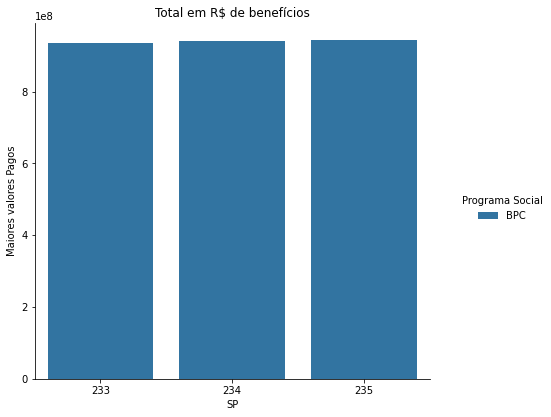

In [60]:
grafico = sns.catplot(x='index', y= 'Valor Transferido', hue='Programa Social', data = maiores_valores.reset_index(), kind='bar')
grafico.ax.set_xlabel('SP'); grafico.fig.set_size_inches(8,6)
grafico.ax.set_ylabel('Maiores valores Pagos')
grafico.ax.set_title('Total em R$ de benefícios')

#### Os 10 MENORES VALORES Pagos informando a UF e o Beneficio Correspondente

In [16]:
df1.nsmallest(10, 'Valor Transferido')

,UF,Mês/Ano,Valor Transferido,Programa Social
0,AP,2022-01-01,3451.0,Auxílio Emergencial
1,AC,2022-01-01,4602.0,Auxílio Emergencial
2,DF,2022-01-01,8898.0,Auxílio Emergencial
3,TO,2022-01-01,9600.0,Auxílio Emergencial
4,MT,2022-01-01,14105.0,Auxílio Emergencial
5,DF,2022-02-01,14544.0,Seguro Defeso
6,MS,2022-01-01,17400.0,Auxílio Emergencial
7,DF,2022-01-01,20248.0,Seguro Defeso
8,AM,2022-01-01,28381.0,Auxílio Emergencial
9,RN,2022-01-01,28900.0,Garantia-Safra


##### Os 3 MENORES VALORES Pagos informando a UF e o Beneficio Correspondente

In [17]:
menores_valores = df1.nsmallest(3, 'Valor Transferido')
menores_valores

,UF,Mês/Ano,Valor Transferido,Programa Social
0,AP,2022-01-01,3451.0,Auxílio Emergencial
1,AC,2022-01-01,4602.0,Auxílio Emergencial
2,DF,2022-01-01,8898.0,Auxílio Emergencial


Text(0.5, 1.0, 'Total em R$ de benefícios')

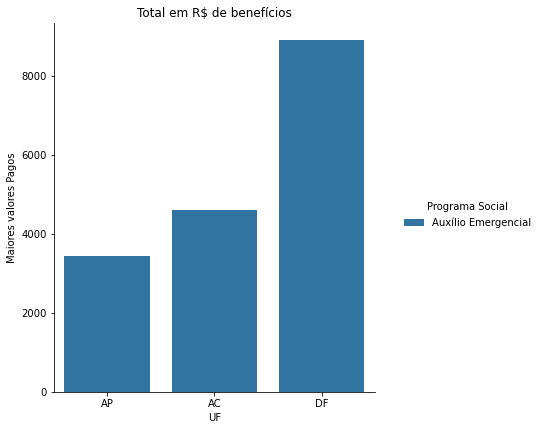

In [56]:
grafico = sns.catplot(x='UF', y= 'Valor Transferido', hue='Programa Social', data = menores_valores.reset_index(), kind='bar')
grafico.ax.set_xlabel('UF'); grafico.fig.set_size_inches(8,6)
grafico.ax.set_ylabel('Maiores valores Pagos')
grafico.ax.set_title('Total em R$ de benefícios')

In [19]:
total_porUF = df1.groupby('UF')['Valor Transferido'].sum()

In [20]:
total_porUF = pd.DataFrame(total_porUF)

In [21]:
total_porUF['Valor Transferido'] = total_porUF['Valor Transferido'].apply(lambda x: int(x))

#### Total em R$ de benefícios por UF 

In [22]:
total_porUF.reset_index(drop = False)

,UF,Valor Transferido
0,AC,139752567
1,AL,577166608
2,AM,631450811
3,AP,146320115
4,BA,2348708118
5,CE,1439927589
6,DF,262950514
7,ES,375496614
8,GO,766121988
9,MA,1017443530


In [23]:
total_porUF = total_porUF.sort_values(by = 'Valor Transferido')

<AxesSubplot:title={'center':'Total em R$ de benefícios por UF'}, xlabel='UF', ylabel='Valor transferido por UF'>

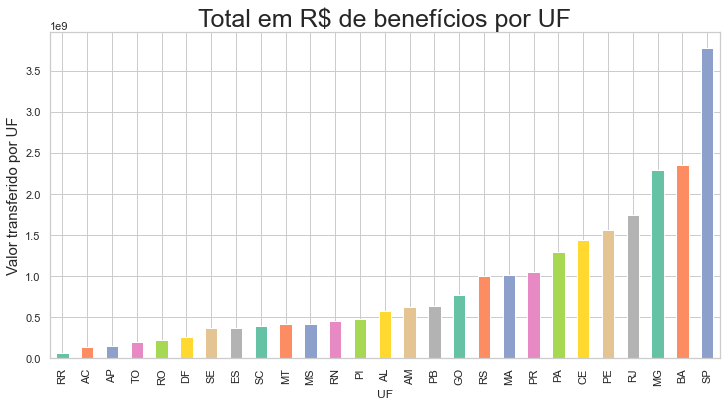

In [64]:
sns.set_theme(style='whitegrid', color_codes = True)

plt.title('Total em R$ de benefícios por UF', fontsize =25)
plt.ylabel('Valor transferido por UF', fontsize =15)
total_porUF['Valor Transferido'].nsmallest(27).plot(kind = 'bar',figsize = (12, 6), color = sns.color_palette('Set2'))

In [62]:
regiao = {'Norte': ['AM', 'RR','AP', 'PA', 'TO', 'RO', 'AC'], 'Nordeste': ['MA', 'PI','CE', 'RN', 'PE', 'PB','SE', 'AL','BA'],'Centro_Oeste':['MT', 'MS', 'GO'],'Sudeste':['SP', 'RJ','ES','MG'], 'Sul':['PR', 'RS', 'SC']}

In [ ]:
#regiao

In [66]:
def collect_data_in_dataframe_different_columns (dict_:dict, dataframe:pd.DataFrame, columns:str, coluna)->pd.DataFrame:
    soma = 0
    dict_regioes = {}
    for index in range(len(dataframe)) :
        UF = dataframe[columns][index]
        for regiao in dict_:
            if UF in dict_[regiao]:
                soma += dataframe[coluna][index]
            dict_regioes[regiao] = int(soma)

    return dict_regioes

In [67]:
soma_regioes = collect_data_in_dataframe_different_columns(regiao, df1, 'UF', 'Valor Transferido')

#### Total em R$ de Benefícios por Região (S, SE, CO, NE e N)

In [68]:
beneficio_por_regioes = pd.DataFrame.from_dict(soma_regioes, orient ='index').rename(columns={0:'Total de Beneficios'})
beneficio_por_regioes

,Total de Beneficios
Norte,22903529742
Nordeste,22903529742
Centro_Oeste,22903529742
Sudeste,23847359710
Sul,23847359710


<AxesSubplot:title={'center':'Total em R$ de benefícios por Região'}, ylabel='Valor transferido por região'>

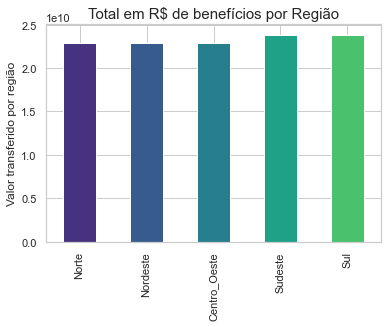

In [69]:
plt.title('Total em R$ de benefícios por Região', fontsize =15)
plt.ylabel('Valor transferido por região', fontsize =12)
beneficio_por_regioes['Total de Beneficios'].nsmallest(5).plot(kind = 'bar', color = sns.color_palette('viridis'))


In [70]:
beneficio_por_regioes['Total de Beneficios'].sum()

116405308646

In [71]:
def collect_data_in_dataframe_different_columns (dict_:dict, dataframe:pd.DataFrame, columns:str, coluna)->pd.DataFrame:
    list_soma = []
    cont = 0
    soma = 0
    list_media = []
    list_regioes = []
    df_tmp = pd.DataFrame(columns=['Regiao','Valor','Media'])
    for index in range(len(dataframe)) :
        UF = dataframe[columns][index]
        for regiao in dict_:
            if UF in dict_[regiao]:
                soma += dataframe[coluna][index]
                cont +=1
            list_regioes.append(regiao)
            list_soma.append(int(soma))
            list_media.append(int(soma / cont))
    df_tmp['Regiao'] = list_regioes
    df_tmp['Valor'] = list_soma
    df_tmp['Media'] = list_media

    return df_tmp

In [72]:
soma_regioes2 = collect_data_in_dataframe_different_columns(regiao, df1, 'UF', 'Valor Transferido')
soma_regioes2 = soma_regioes2[-5:]
soma_regioes2.reset_index(inplace=True, drop=True)

#### Total em R$ de Benefícios por Região e Média

In [73]:
soma_regioes2


,Regiao,Valor,Media
0,Norte,22903529742,100896606
1,Nordeste,22903529742,100896606
2,Centro_Oeste,22903529742,100896606
3,Sudeste,23847359710,104593682
4,Sul,23847359710,104593682


Text(0.5, 1.0, 'Total em R$ de benefícios por Região')

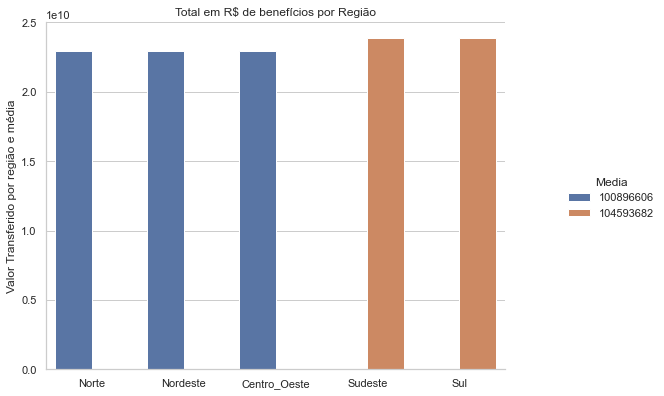

In [75]:

grafico = sns.catplot(x='Regiao', y= 'Valor', hue='Media', data = soma_regioes2.reset_index(), kind='bar')
grafico.ax.set_xlabel(''); grafico.fig.set_size_inches(10,6)
grafico.ax.set_ylabel('Valor Transferido por região e média')
grafico.ax.set_title('Total em R$ de benefícios por Região')